In [122]:
#!/usr/bin/env python3
import netCDF4 as nc # handles netCDF files '.nc'
import matplotlib.pylab as plt # plots data on graphs
from mpl_toolkits.basemap import Basemap #gives basemap 
import numpy as np   # deals with arrays and allows indexing
import xarray as xr  # deals with four-dimensional arrays
import pandas as pd  # use of data in dataframe format 
from netCDF4 import Dataset  

## Opening the two datasets using xarray, the reason being is it handles dates more efficiently 

In [123]:
sit_file = '/Users/fridaperez/Developer/repos/eeb-c177-project/sit.nc'
tmp_file = '/Users/fridaperez/Developer/repos/eeb-c177-project/air.nc'

dset = xr.open_dataset(sit_file)
cset = xr.open_dataset(tmp_file)

print(dset)
print(cset)

<xarray.Dataset>
Dimensions:   (time: 55, u: 850, v: 850)
Coordinates:
  * time      (time) datetime64[ns] 2002-10-15 2003-05-15 ... 2011-10-15
    latitude  (u, v) float32 ...
Dimensions without coordinates: u, v
Data variables:
    SIT       (time, u, v) float32 ...
Attributes:
    CDI:                       Climate Data Interface version 1.9.6 (http://m...
    history:                   Sat Feb 29 13:33:06 2020: cdo -select,name=SIT...
    institution:               CTOH/LEGOS/CNRS-CNES-IRD-Universite de Toulous...
    Conventions:               CF-1.6
    title:                     Monthly Altimetric SIT products from envisat
    projection:                laea
    grid_type:                 np2ease
    lat_ts:                    0
    lon_0:                     0
    pixel_size:                12500
    width:                     6250000
    height:                    6250000
    lat_0:                     -90
    lat_min:                   -90
    lat_max:                   -60
 

In [124]:
sit_var = dset.variables # reading in the variables for Sea Ice Thickness 

In [125]:
sit_att= dset.assign_attrs

In [173]:
print(sit_att)

<bound method DataWithCoords.assign_attrs of <xarray.Dataset>
Dimensions:   (time: 55, u: 850, v: 850)
Coordinates:
  * time      (time) datetime64[ns] 2002-10-15 2003-05-15 ... 2011-10-15
    latitude  (u, v) float32 ...
Dimensions without coordinates: u, v
Data variables:
    SIT       (time, u, v) float32 ...
Attributes:
    CDI:                       Climate Data Interface version 1.9.6 (http://m...
    history:                   Sat Feb 29 13:33:06 2020: cdo -select,name=SIT...
    institution:               CTOH/LEGOS/CNRS-CNES-IRD-Universite de Toulous...
    Conventions:               CF-1.6
    title:                     Monthly Altimetric SIT products from envisat
    projection:                laea
    grid_type:                 np2ease
    lat_ts:                    0
    lon_0:                     0
    pixel_size:                12500
    width:                     6250000
    height:                    6250000
    lat_0:                     -90
    lat_min:              

## Opening the two datasets using netCDF to assign variables to plot 

In [127]:
tmp_data = Dataset('air.mon.mean__M-O_2002-2011.nc')
sea_data = Dataset('envisat_SIT_fb_snow-AMSR_sh_2002_2011_ease2_w50000.nc')

In [128]:
# assinging the variables for Temperature
lon_t = tmp_data.variables["lon"][:]
lat_t = tmp_data.variables["lat"][:]
level = tmp_data.variables["level"][:]
air = tmp_data.variables["air"][:]
tmp_time = tmp_data.variables["time"]

In [180]:
# Slicing the 'z' axis, to only get the mean surface temp at 850 hPa where most convergence occurs
air_temp_at_surf=(air[:,2,:,:])
#print(air_temp_at_surf)
#Finding index value of certain longitudes
print(np.where(lon_t==-62.5))
print(np.where(lon_t==-90))
air_temp_at_surf.shape
#Indexing to only get the Antarctic Circle
antcircle=air_temp_at_surf[:,36:47,:]
print(antcircle)

(array([], dtype=int64),)
(array([], dtype=int64),)


In [129]:
# assinging the variables for SIT
lon_sit = sea_data.variables["longitude"][:]
lat_sit = sea_data.variables["latitude"][:]
SIT = sea_data.variables["SIT"][:]
SIT_time= sea_data.variables["time"]

In [130]:
import datetime as dt
from netCDF4 import Dataset, date2index, num2date, date2num

dates_T=num2date(SIT_time[:],SIT_time.units)

In [131]:
dates_pd = pd.to_datetime(dates_T)
print
(dates_pd)

DatetimeIndex(['2002-10-15', '2003-05-15', '2003-06-15', '2003-07-15',
               '2003-08-15', '2003-09-15', '2003-10-15', '2004-05-15',
               '2004-06-15', '2004-07-15', '2004-08-15', '2004-09-15',
               '2004-10-15', '2005-05-15', '2005-06-15', '2005-07-15',
               '2005-08-15', '2005-09-15', '2005-10-15', '2006-05-15',
               '2006-06-15', '2006-07-15', '2006-08-15', '2006-09-15',
               '2006-10-15', '2007-05-15', '2007-06-15', '2007-07-15',
               '2007-08-15', '2007-09-15', '2007-10-15', '2008-05-15',
               '2008-06-15', '2008-07-15', '2008-08-15', '2008-09-15',
               '2008-10-15', '2009-05-15', '2009-06-15', '2009-07-15',
               '2009-08-15', '2009-09-15', '2009-10-15', '2010-05-15',
               '2010-06-15', '2010-07-15', '2010-08-15', '2010-09-15',
               '2010-10-15', '2011-05-15', '2011-06-15', '2011-07-15',
               '2011-08-15', '2011-09-15', '2011-10-15'],
              dtype

In [192]:
def clim_plot(data):
    m = Basemap(projection='spstere',boundinglat=-50,lon_0=90,resolution='l')
    x, y = m(lon_sit, lat_sit )
    fig = plt.figure(figsize=(15,7))
    m.fillcontinents(color='white',lake_color='white')
    m.drawcoastlines()
    m.drawparallels(np.arange(-80.,81.,20.))
    m.drawmeridians(np.arange(-180.,181.,20.))
    m.drawmapboundary(fill_color='skyblue')
    m.contourf(x,y,data,40,cmap=plt.cm.get_cmap('jet'))
    plt.title('Sea Ice Thickness (in meters)')
    plt.colorbar()


/Users/fridaperez/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


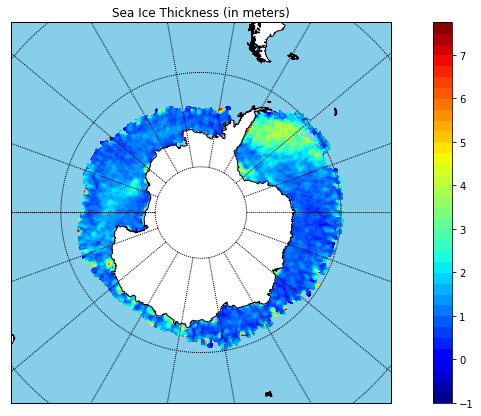

In [193]:
#here we use the function that was defined to plot Antarctica, calling SIT variable at the first timestep
clim_plot(SIT[44])
#plt.savefig('SITmap.png')


In [134]:
#to get the average sea ice thickness we must go through all the values and do so with a for loop
#the reason 'np.nanmean' is used is to take an average of the array, but because values do not exist for every lat and lon for the array
sit_mean=[]
for y in range(len(SIT)):
    mean = np.nanmean(SIT[y])
    sit_mean.append(mean)

/Users/fridaperez/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """


In [135]:
print(sit_mean)

[1.0701234, 1.2257842, 1.2730579, 1.3609455, 1.3396847, 1.2838069, 0.91756576, 1.3589236, 1.4175305, 1.4811722, 1.3690678, 1.2644144, 0.89857256, 1.1891401, 1.4196584, 1.3836606, 1.3122635, 1.2869073, 0.91318613, 1.1432565, 1.2060528, 1.269771, 1.3158885, 1.1876222, 0.8987039, 1.1378773, 1.2981393, 1.4271022, 1.3540497, 1.3327978, 0.9211405, 1.2074852, 1.383052, 1.4741436, 1.4637773, 1.4633551, 1.0138283, 1.2541891, 1.3918551, 1.4536383, 1.5196618, 1.4750087, 0.9954332, 1.1593206, 1.230843, 1.389208, 1.3483666, 1.3287189, 0.948864, 1.161152, 1.3118474, 1.4788907, 1.4660721, 1.4321911, nan]


<function matplotlib.pyplot.show(*args, **kw)>

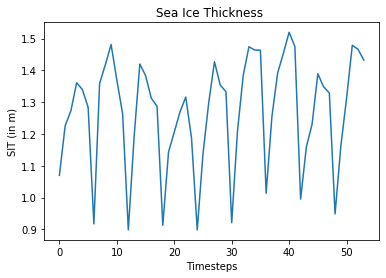

In [116]:
ave_plot = plt.plot(sit_mean)
plt.xlabel('Timesteps')
plt.ylabel('SIT (in m)')
plt.title('Sea Ice Thickness ')
plt.show
plt.savefig('SIT_mean.png')


In [153]:
air_mean=[]
for i in range(len(air)):
    mean = np.mean(air[i])
    air_mean.append(mean)

In [154]:
print(air_mean)

[-35.57258, -35.303635, -35.17393, -35.400997, -35.42204, -35.7434, -35.717957, -35.689194, -35.62824, -35.820965, -36.290543, -36.040337, -35.6395, -35.537907, -35.668243, -35.796658, -36.122993, -35.98834, -35.772186, -35.447258, -35.443504, -35.836376, -36.180897, -36.09501, -35.95544, -35.49739, -35.429375, -35.780838, -36.461266, -36.503487, -35.786716, -35.493046, -35.359844, -35.75794, -36.318157, -36.032063, -36.17521, -35.862, -35.72921, -36.129494, -36.47456, -36.607338, -35.875572, -35.706547, -35.413055, -35.970707, -36.33728, -36.19155, -35.699104, -35.510654, -35.32726, -35.458202, -36.03096, -36.34557, -35.824707, -35.6861, -35.3619, -35.786816, -36.493145, -36.79173]


<function matplotlib.pyplot.show(*args, **kw)>

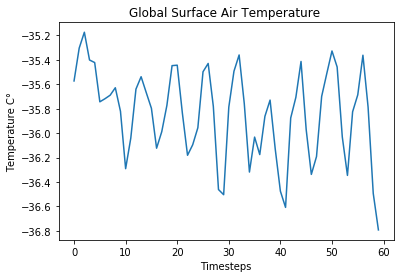

In [183]:
avetemp_plot = plt.plot(air_mean) #we are assinging a plot for the mean air temperature
plt.xlabel('Timesteps')           #labelling x-axis
plt.ylabel('Temperature C°')      #labelling y-axis
plt.title('Global Surface Air Temperature ') #giving the plot a title
plt.show
plt.savefig('global_tmp.png')

In [181]:
ant_mean=[]
for i in range(len(antcircle)):
    mean = np.mean(antcircle[i])
    ant_mean.append(mean)

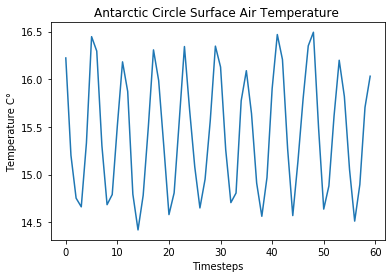

In [194]:
anttemp_plot = plt.plot(ant_mean)
plt.xlabel('Timesteps')
plt.ylabel('Temperature C°')
plt.title('Antarctic Circle Surface Air Temperature ')
plt.show
#plt.savefig('ant_temp.png')